# [Preprocessing]

## Load "Train" Data
> **load_data** in **utils.py** Line 6

> /KorQuADv2/의 압축 파일들을 unzip하고 나서, (.zip파일이 아닌) .json파일들만을 load<br/>
<br/>.json파일들에서 document들을 추출하여 list형태로 반환<br/>
<br/>KorQuADv2의 train set은 **38,496개**의 document로 구성
```python
def load_data(path='./KorQuADv2/', sort="train"):
    # Load .json files, not .zip files.
    files=[]
    for file in os.listdir(path):
        if file.split(".")[-1]=="json":
            files.append(file)

    # Load "train" or "dev" data.
    datas=[]
    for file in sorted(files):
        if file.split("_")[1]==sort:
            print(file)
            with open(path+file, 'r') as f:
                datas.append(json.load(f))
                f.close()
    
    # Extract documents from data.
    documents=[]
    for data in datas:
        for document in data['data']:
            documents.append(document)
    print("Total", len(documents), "Documents")

    return documents
```

In [1]:
from utils import load_data
documents_train=load_data(path='./KorQuADv2/', sort="train")

korquad2.1_train_00.json
korquad2.1_train_01.json
korquad2.1_train_02.json
korquad2.1_train_03.json
korquad2.1_train_04.json
korquad2.1_train_05.json
korquad2.1_train_06.json
korquad2.1_train_07.json
korquad2.1_train_08.json
korquad2.1_train_09.json
korquad2.1_train_10.json
korquad2.1_train_11.json
korquad2.1_train_12.json
korquad2.1_train_13.json
korquad2.1_train_14.json
korquad2.1_train_15.json
korquad2.1_train_16.json
korquad2.1_train_17.json
korquad2.1_train_18.json
korquad2.1_train_19.json
korquad2.1_train_20.json
korquad2.1_train_21.json
korquad2.1_train_22.json
korquad2.1_train_23.json
korquad2.1_train_24.json
korquad2.1_train_25.json
korquad2.1_train_26.json
korquad2.1_train_27.json
korquad2.1_train_28.json
korquad2.1_train_29.json
korquad2.1_train_30.json
korquad2.1_train_31.json
korquad2.1_train_32.json
korquad2.1_train_33.json
korquad2.1_train_34.json
korquad2.1_train_35.json
korquad2.1_train_36.json
korquad2.1_train_37.json
korquad2.1_train_38.json
Total 38496 Documents


## Data Analysis
> train set의 경우 1개의 document에서 평균 **2.17개**의 질의응답 쌍, 총 **83,486개**의 질의응답 쌍이 존재<br/>
<br/>document는 dictionary형태로 **"context"** key를 통해 본문에, **"qas"** key를 통해 질의응답 쌍 list에 접근 가능<br/>
<br/>질의응답 쌍 역시 dictionary형태로 **"question"**과 **"answer"** key로 **질문**과 **정답** 정보에 접근 가능<br/>
<br/>정답 정보에는 정답 텍스트(**"text"**)와 context에서의 정답의 시작 위치(**"answer_start"**) 등이 포함

In [2]:
nums_qas=[]
for document in documents_train:
    nums_qas.append(len(document['qas']))
print("Total", sum(nums_qas), "QAs")
print("Average", sum(nums_qas)/len(nums_qas), "QAs")

Total 83486 QAs
Average 2.16869285120532 QAs


In [3]:
print(documents_train[7777]['context'])

<!DOCTYPE html>
<html>
<head>
<meta>
<title>설정 - 위키백과, 우리 모두의 백과사전</title>


<link>

<meta>
<link>
<meta>
<meta>
<meta>
<meta>
<link>
<link>
<link>
<link>
<link>
<link>
<link>
<link>
<link>
<link>
<link>

</head>
<body>
<div></div>
<div></div>
<div>
<a></a>
<div></div>
<div>
</div>
<h1>설정</h1>
<div>
<div>위키백과, 우리 모두의 백과사전.</div>
<div></div>
<div></div>
<a>둘러보기로 가기</a>
<a>검색하러 가기</a>
<div><div><div><a><img></a>  컴퓨터에서 환경에 맞게 요소를 배치하거나 설치하는 것에 대해서는 <a>세팅</a> 문서를 참조하십시오.</div>
<p><b>설정</b>(setting)은 <a>이야기</a>나 작품 속 <a>시간</a> 및 장소를 의미한다. 문학 요소로서, 설정은 배경과 <a>분위기</a>를 이야기의 기반으로 삼는 것에 도움을 준다. 설정은 이야기의 직접적 배경에 더해 이야기 속 세계나 맥락이 이루어지는 <i>사회적 배경</i>을 의미해 왔다.<sup><a>[1]</a></sup> 설정의 요소들은 <a>문화</a>, <a>역사적 시대</a>, <a>지리</a>, 시간 등을 포함할 수 있다. 설정은 이야기의 기반 만들기 혹은 기반 그 자체를 의미하게 된다. <a>플롯</a>, <a>등장인물</a>, <a>주제</a>, <a>문체</a>와 함께, 설정은 <a>허구</a>의 기반 요소가 된다.<sup><a>[2]</a></sup>
</p>
<div><input><div><h2>목차</h2><span><label></label></span></div>
<ul>
<li><a><span>1</span> <span>개요</span></a></li>
<li><a

In [4]:
for qa in documents_train[7777]['qas']:
    print("="*125)
    print(qa['question'])
    print("="*125)
    for key in qa['answer'].keys():
        print("\"", key, "\"")
        print(qa['answer'][key])
        print("")

왜 설정이 이야기에서 중요한가요?
" text "
<p>설정은 이야기의 구성을 결정하는 데 중요한 항목이기 때문에, 한 번 설정을 한 것을 쉽게 바꿀 수는 없다. 예를 들어, 일본을 주된 무대로 하고 있었음이 분명한 이야기의 배경이 갑자기 유럽으로 옮겨지거나, 남자였음이 분명한 등장인물이 갑자기 여자가 되면 이야기의 정합성이 잡히지 않게 되어, 이야기 그 자체가 무너져 버리게 되는 것이다. 이야기의 정합성을 취하기 위해서 나중에 설정이 더해지거나 없었던 일로 되거나 하는 경우도 있는데, 그것은 일반적으로 부록 설정이라 한다.
</p>

" html_answer_start "
10776

" html_answer_text "
<p>설정은 이야기의 구성을 결정하는 데 중요한 항목이기 때문에, 한 번 설정을 한 것을 쉽게 바꿀 수는 없다. 예를 들어, 일본을 주된 무대로 하고 있었음이 분명한 이야기의 배경이 갑자기 유럽으로 옮겨지거나, 남자였음이 분명한 등장인물이 갑자기 여자가 되면 이야기의 정합성이 잡히지 않게 되어, 이야기 그 자체가 무너져 버리게 되는 것이다. 이야기의 정합성을 취하기 위해서 나중에 설정이 더해지거나 없었던 일로 되거나 하는 경우도 있는데, 그것은 일반적으로 부록 설정이라 한다.
</p>

" answer_start "
2108

설정의 주요 항목은 무엇이 있는가?
" text "
<ul><li><a>대체 역사</a></li>
<li><a>세계 설정</a></li>
<li><a>유토피아</a></li>
<li><a>디스토피아</a></li>
<li><a>허구 도시</a></li>
<li><a>허구 국가</a></li>
<li><a>허구 세계</a></li>
<li><a>허구 장소</a></li>
<li><a>크로스오버</a></li>
<li><a>모의 현실</a></li>
<li><a>가상현실</a></li></ul>

" html_answer_start "
11435

" html_answer_text "
<ul><li><a href="/wi

## HTML Tags
> KorQuADv2에는 HTML Tag들이 등장<br/>
<br/>그러나, 일반적으로 HTML Tag들은 Wordpiece(혹은 Sentencepiece) Tokenizer의 Vocab에 포함되지 않음<br/>
<br/>-> tokenizing 결과 HTML Tag들을 모두 분해 해버림<br/>

In [5]:
# Load pre-trained tokenizer
from transformers import ElectraTokenizer
tokenizer=ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

print(documents_train[666]['context'].split("\n")[50])
print("")
print(" ".join(tokenizer.tokenize(documents_train[666]['context'].split("\n")[50])))

<td colspan="2"><a><img></a><br/>2006년 10월 23일에 준공한 MBC충북 청주방송국 <br/> 現 가경동 사옥

< t ##d col ##sp ##an = " 2 " > < a > < im ##g > < / a > < br / > 2006 ##년 10 ##월 23 ##일 ##에 준공 ##한 MBC ##충 ##북 청주 ##방송 ##국 < br / > 現 가 ##경 ##동 사옥


> 즉, HTML Tag들은 일종의 **"Domain-Specific"** 한 단어들로 생각할 수 있음!<br/>
<br/>Google BERT 저자에 의하면 Domain-Specific한 단어들은 다음과 같이 처리할 수 있음<br/>
<br/>[https://github.com/google-research/bert/issues/9](https://github.com/google-research/bert/issues/9)<br/>
<br/>본 프로젝트에서는 HTML Tag들을 Vocab의 **[unusedX]** 토큰들과 교체하고 Special Tokens에 추가하는 방식으로 처리!

> train set에 등장하는 모든 HTML Tag들을 탐색

In [6]:
import re

tags_html=[]
for document in documents_train:
    tags_html=list(set(tags_html+re.findall("<[^>]*>", document['context'])))
print("Total", len(tags_html), "Tags")
print("")
for tag in sorted(tags_html):
    print(tag)

Total 643 Tags

<!DOCTYPE html>
</a>
</abbr>
</annotation>
</audio>
</b>
</bdi>
</big>
</blockquote>
</body>
</caption>
</center>
</cite>
</code>
</dd>
</del>
</div>
</dl>
</dt>
</font>
</form>
</h1>
</h2>
</h3>
</h4>
</h5>
</h6>
</head>
</html>
</i>
</ins>
</kbd>
</label>
</li>
</map>
</math>
</menclose>
</mfrac>
</mi>
</mmultiscripts>
</mn>
</mo>
</mover>
</mpadded>
</mprescripts>
</mroot>
</mrow>
</mspace>
</msqrt>
</mstyle>
</msub>
</msubsup>
</msup>
</mtable>
</mtd>
</mtext>
</mtr>
</munder>
</munderover>
</none>
</noscript>
</ol>
</p>
</pre>
</q>
</rb>
</rp>
</rt>
</ruby>
</s>
</samp>
</semantics>
</small>
</span>
</strong>
</style>
</sub>
</sup>
</table>
</tbody>
</td>
</th>
</title>
</tr>
</tt>
</u>
</ul>
</var>
</video>
<a>
<abbr>
<annotation>
<area>
<audio>
<b>
<bdi>
<big>
<blockquote>
<body>
<br/>
<br>
<caption>
<center>
<cite>
<code>
<dd>
<del>
<div>
<dl>
<dt>
<font>
<form>
<h1>
<h2>
<h3>
<h4>
<h5>
<h6>
<head>
<hr/>
<hr>
<html>
<i>
<img>
<input>
<ins>
<kbd>
<label>
<li>
<li

> 위 HTML Tag들을 살펴보면 **"td"**, **"th"** Tag들이 속성으로 가지는 "colspan" 혹은 "rowspan"의 값에 따라 각기 다르게 추가되어 있음<br/>
<br/>속성 값의 의미를 유지하며 위의 문제를 해결하기 위해 다음과 같은 방식으로 전처리를 수행

> \<td colspan="3" rowspan="1"> -> \<td cs rs>3 1<br/>
<br/>\<td colspan="7" rowspan="10"> -> \<td cs rs>7 10<br/>
<br/>\<th colspan="12"> -> \<th cs>12<br/>
<br/>\<th rowspan="23"> -> \<th rs>23

> **preprocess** in **utils.py** Line 70
```python
def preprocess(documents):
    for idx, document in enumerate(documents):
        context=document['context']

        # Replace "td" tags.
        tags_td=list(set(re.findall("<td[^>]*>", context)))
        for tag in tags_td:
            context=re.sub(tag, replace_table_tags(tag=tag, sort="td"), context)

        # Replace "th" tags.
        tags_th=list(set(re.findall("<th[^>]*>", context)))
        for tag in tags_th:
            context=re.sub(tag, replace_table_tags(tag=tag, sort="th"), context)
        
        documents[idx]['context']=context
```

> **replace_table_tags** in **utils.py** Line 31
```python
def replace_table_tags(tag, sort):
    soup=BeautifulSoup(tag, 'html.parser')

    if sort=="td":
        try:
            colspan=soup.td['colspan']
        except(ValueError, KeyError):
            colspan=None

        try:
            rowspan=soup.td['rowspan']
        except(ValueError, KeyError):
            rowspan=None

    if sort=="th":
        try:
            colspan=soup.th['colspan']
        except(ValueError, KeyError):
            colspan=None

        try:
            rowspan=soup.th['rowspan']
        except(ValueError, KeyError):
            rowspan=None
    
    if colspan is not None and rowspan is not None:
        tag_replaced="<{} cs rs>{} {}".format(sort, colspan, sort, rowspan)
    elif colspan is not None and rowspan is None:
        tag_replaced="<{} cs>{}".format(sort, colspan)
    elif colspan is None and rowspan is not None:
        tag_replaced="<{} rs>{}".format(sort, rowspan)
    else:
        tag_replaced="<{}>".format(sort)
            
    if len(tag)>len(tag_replaced):
        tag_replaced=tag_replaced+" "*(len(tag)-len(tag_replaced))

    return tag_replaced
```

In [7]:
# Preprocess data.
from utils import preprocess
preprocess(documents_train)

> 전처리 후 HTML Tag들을 재탐색하여 Tokenizer Vocab에 추가

In [8]:
tags_html=[]
for document in documents_train:
    tags_html=list(set(tags_html+re.findall("<[^>]*>", document['context'])))
print("Total", len(tags_html), "Tags")
print("")
for tag in sorted(tags_html):
    print(tag)

# Replace [unusedX] tokens with HTML Tags.
# Add HTML Tags to special tokens.
for idx, tag in enumerate(sorted(tags_html)):
    tokenizer.vocab[tag]=tokenizer.vocab["[unused{}]".format(idx)]
    del tokenizer.vocab["[unused{}]".format(idx)]
tokenizer.add_special_tokens({'additional_special_tokens':sorted(tags_html)})

Total 196 Tags

<!DOCTYPE html>
</a>
</abbr>
</annotation>
</audio>
</b>
</bdi>
</big>
</blockquote>
</body>
</caption>
</center>
</cite>
</code>
</dd>
</del>
</div>
</dl>
</dt>
</font>
</form>
</h1>
</h2>
</h3>
</h4>
</h5>
</h6>
</head>
</html>
</i>
</ins>
</kbd>
</label>
</li>
</map>
</math>
</menclose>
</mfrac>
</mi>
</mmultiscripts>
</mn>
</mo>
</mover>
</mpadded>
</mprescripts>
</mroot>
</mrow>
</mspace>
</msqrt>
</mstyle>
</msub>
</msubsup>
</msup>
</mtable>
</mtd>
</mtext>
</mtr>
</munder>
</munderover>
</none>
</noscript>
</ol>
</p>
</pre>
</q>
</rb>
</rp>
</rt>
</ruby>
</s>
</samp>
</semantics>
</small>
</span>
</strong>
</style>
</sub>
</sup>
</table>
</tbody>
</td>
</th>
</title>
</tr>
</tt>
</u>
</ul>
</var>
</video>
<a>
<abbr>
<annotation>
<area>
<audio>
<b>
<bdi>
<big>
<blockquote>
<body>
<br/>
<br>
<caption>
<center>
<cite>
<code>
<dd>
<del>
<div>
<dl>
<dt>
<font>
<form>
<h1>
<h2>
<h3>
<h4>
<h5>
<h6>
<head>
<hr/>
<hr>
<html>
<i>
<img>
<input>
<ins>
<kbd>
<label>
<li>
<li

0

> 전처리 및 HTML Tag들 Vocab 추가 이후

In [9]:
print(documents_train[666]['context'].split("\n")[50])
print("")
print(" ".join(tokenizer.tokenize(documents_train[666]['context'].split("\n")[50])))

<td cs>2        <a><img></a><br/>2006년 10월 23일에 준공한 MBC충북 청주방송국 <br/> 現 가경동 사옥

<td cs> 2 <a> <img> </a> <br/> 2006 ##년 10 ##월 23 ##일 ##에 준공 ##한 MBC ##충 ##북 청주 ##방송 ##국 <br/> 現 가 ##경 ##동 사옥


## Contexts Length
> document들의 context를 tokenizing한 sequence length는 다음과 같은 분포를 따름<br/>
<br/>Transformer Encoder기반의 모델들(BERT 등)은 input sequence의 max length(**512**)가 고정되어 있음<br/>
<br/>-> context length가 긴 KorQuADv2를 학습시키기 위해 **context segmentation**을 수행! (추후에)

In [10]:
import pickle
with open('./pickles/contexts_encoded.pkl', 'rb') as f:
    contexts_encoded=pickle.load(f)
    f.close()

len_contexts=[]
for context in contexts_encoded:
    len_contexts.append(len(context))
print(len(len_contexts),"Contexts")
print("")

print("Shortest Length",min(len_contexts))
print("Longest Length",max(len_contexts))
print("AVG Length",sum(len_contexts)/len(len_contexts))
print("Cumulative 90%",sorted(len_contexts,reverse=True)[int(len(len_contexts)/10)])

38496 Contexts

Shortest Length 1080
Longest Length 253818
AVG Length 6488.835021820449
Cumulative 90% 12314


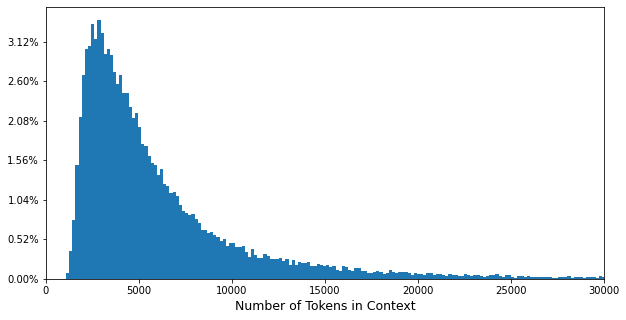

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()
ax.hist(len_contexts,bins=1500,cumulative=False)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(len_contexts)))
ax.set_xlim([0,30000])
ax.set_xlabel("Number of Tokens in Context",fontsize=12.5)
plt.show()